## Regresion Logistica Binomial

### Carga de datos

In [1]:
import pandas as pd

In [2]:
df_data_processing = pd.read_csv('../data/processed/Telco-Customer-Churn_processed.csv')

### Escalar los datos

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
scaler = MinMaxScaler()
df_data_processing_scaled = scaler.fit_transform(df_data_processing) 
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled, columns=df_data_processing.columns)

### Entrenamiento del modelo de regresión logística binomial

In [5]:
X = df_data_processing_scaled.drop('Churn',axis=1)
y = df_data_processing_scaled['Churn'].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [8]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.795260663507109


###  Evaluación del Modelo

In [9]:
model.predict_proba(X_test)

array([[0.99026199, 0.00973801],
       [0.86142958, 0.13857042],
       [0.30082845, 0.69917155],
       ...,
       [0.99033443, 0.00966557],
       [0.70163287, 0.29836713],
       [0.82938519, 0.17061481]])

In [10]:
model.coef_

array([[ 0.21579901, -3.10526247, -0.03615205,  1.19787945, -0.06068636,
        -0.08412597, -0.1339601 , -0.01085223,  0.05598249, -0.20079482,
         0.0412991 , -0.18611143, -0.19572581,  0.0412991 ,  0.00961438,
        -0.44754058,  0.45183569, -0.14910744,  0.19867747, -0.14910744,
        -0.19438235,  0.04183902, -0.14910744, -0.0375439 ,  0.01418609,
        -0.14910744, -0.00989098,  0.17932175, -0.14910744, -0.17502664,
        -0.12417623, -0.14910744,  0.12847134, -0.12628893, -0.14910744,
         0.13058405,  0.70330219, -0.13506516, -0.71304936, -0.17551223,
         0.03069989, -0.03237652, -0.19025467,  0.18520842, -0.10738956]])

In [13]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Axes(0.125,0.11;0.775x0.77)


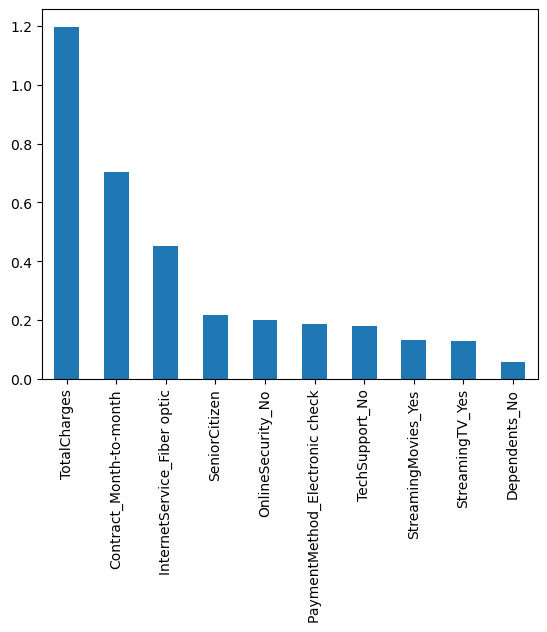

In [18]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


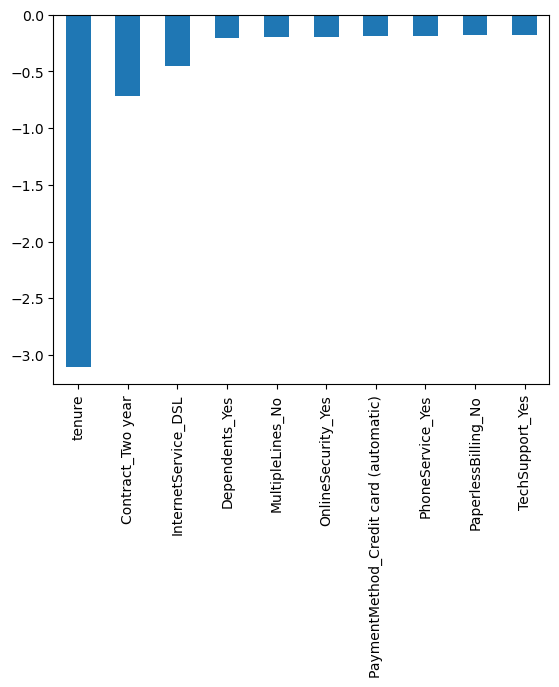

In [19]:
print(weights.sort_values(ascending=True)[:10].plot(kind='bar'))

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

<Figure size 1100x1100 with 0 Axes>

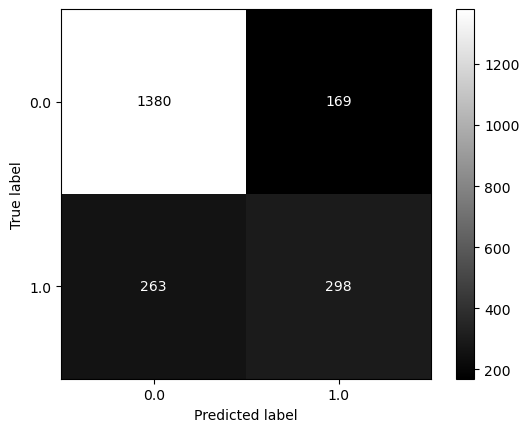

In [23]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()